In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv")
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
df.shape

(37249, 2)

In [ ]:
df.sample()["clean_comment"].values

array([' was collective failure loss not blamed rahulji congress statement coming '],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [ ]:
df.isnull().sum()

,0
clean_comment,100
category,0


In [ ]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [ ]:
df[df['clean_comment'].isna()]['category'].value_counts()

,count
category,
0,100


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(350)

In [ ]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df[(df['clean_comment'].str.strip()=='')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [ ]:
df = df[~(df['clean_comment'].str.strip()=='')]

In [ ]:
## Convert the clean_comment column to lowercase
df['clean_comment'] = df['clean_comment'].str.lower()

## Verity the transformation by displaying the first few rows
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
## Remove all whitespaces
df['clean_comment'] = df['clean_comment'].str.strip()

df['clean_comment'].apply(lambda x:x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [ ]:
## Identify comments containing URLs
url_pattern = r'https?://\S+|www\.\S+'
comment_with_urls = df[df['clean_comment'].str.contains(url_pattern,regex=True)]

comment_with_urls.head()

,clean_comment,category


In [ ]:
## Identify comments containig new line characters
comments_with_newline = df[df['clean_comment'].str.contains('\n')]

comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [ ]:
## Remove new line characters from the "clean_comments" columns
df['clean_comment'] = df['clean_comment'].str.replace('\n',' ',regex=True)

comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining.head()

,clean_comment,category


## EDA

<Axes: xlabel='category', ylabel='count'>

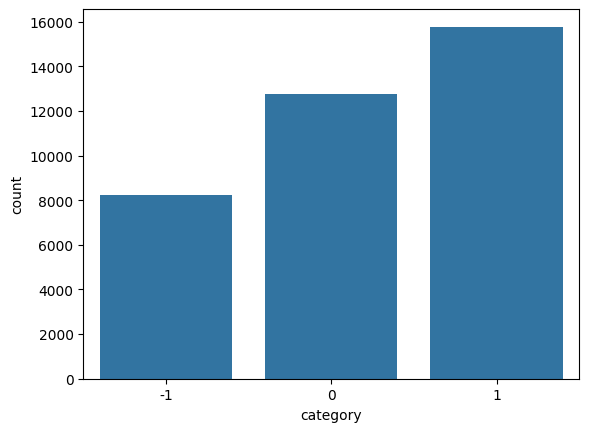

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## Distribution of classes
sns.countplot(data=df,x='category')

In [ ]:
## Frequency distribution of sentiments
df['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1,42.86
0,34.71
-1,22.42


In [ ]:
df['word_count'] = df['clean_comment'].apply(lambda x:len(x.split()))

In [ ]:
df.sample(5)

,clean_comment,category,word_count
5644,found fatman96 alt unsurprisingly this account...,-1,9
31214,saala kya gaand khuja rha hai kya kuch karta k...,0,11
30613,ramya planning contest the 2019 loksabha elect...,0,7
28275,foam blocks zeos staple,0,4
16423,rahul gandhi will give modi run for his money,0,9


In [ ]:
df['word_count'].describe()

,word_count
count,36793.000000
mean,29.667464
std,56.790738
min,1.000000
25%,6.000000
50%,13.000000
75%,30.000000
max,1307.000000


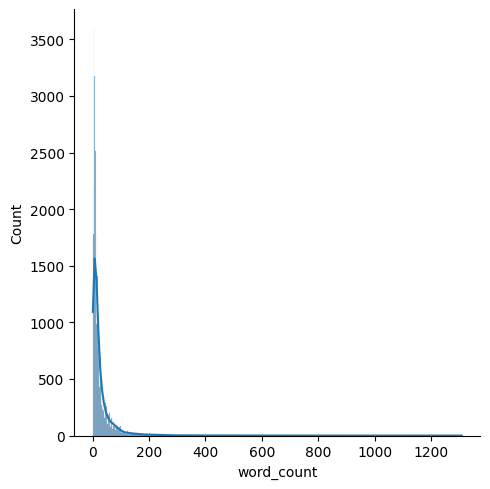

In [ ]:
sns.displot(df['word_count'],kde=True)

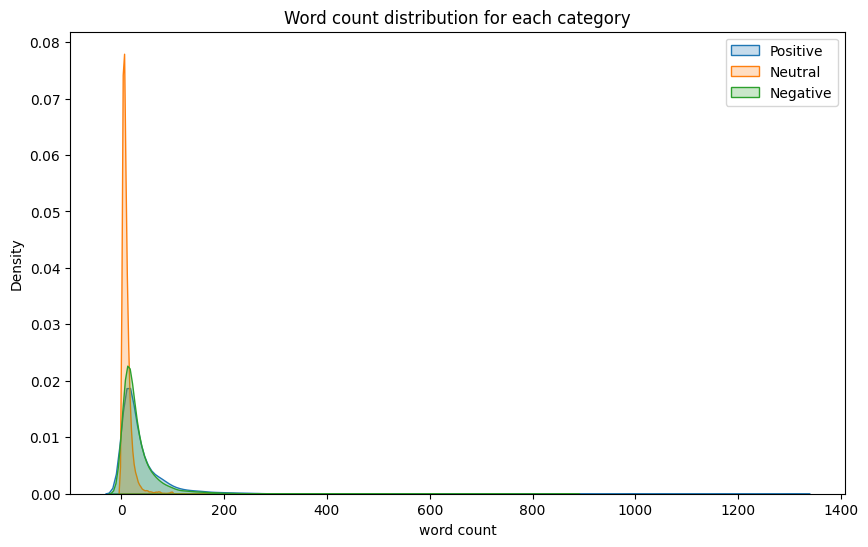

In [ ]:
plt.figure(figsize=(10,6))
## plot KDE for category 1
sns.kdeplot(df[df['category'] ==1]['word_count'],label="Positive",fill=True)
## plot KDE for category 0
sns.kdeplot(df[df['category'] ==0]['word_count'],label="Neutral",fill=True)
## Plot KDE for category -1
sns.kdeplot(df[df['category'] ==-1]['word_count'],label="Negative",fill=True)

## Add title and labels
plt.title("Word count distribution for each category")
plt.xlabel("word count")
plt.ylabel("Density")
plt.legend()
plt.show()

<Axes: ylabel='word_count'>

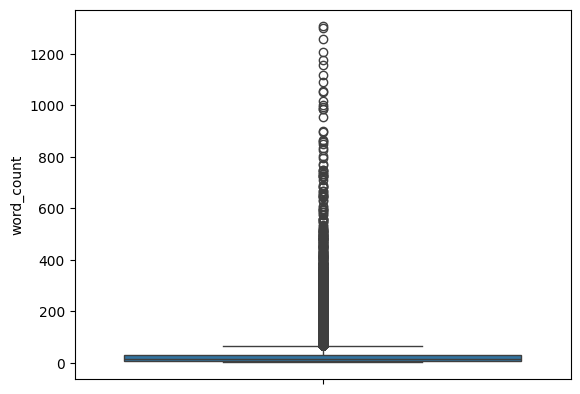

In [ ]:
sns.boxplot(df['word_count'])

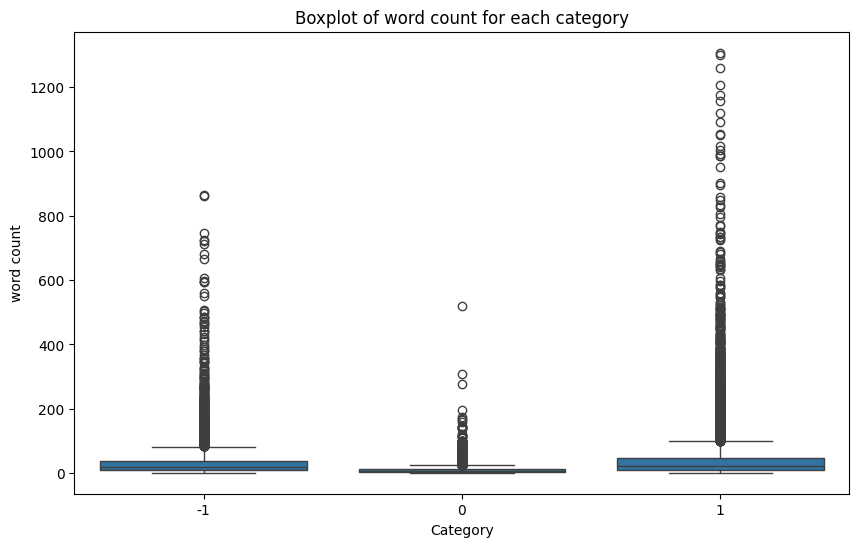

In [ ]:
## Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='category',y='word_count')
plt.title("Boxplot of word count for each category")
plt.xlabel("Category")
plt.ylabel("word count")
plt.show()

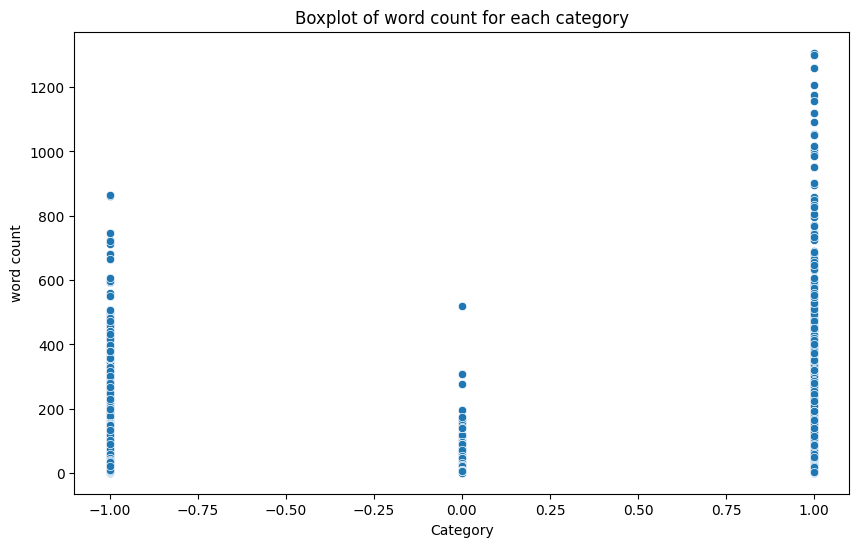

In [ ]:
## Create a scatter plot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='category',y='word_count')
plt.title("Boxplot of word count for each category")
plt.xlabel("Category")
plt.ylabel("word count")
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

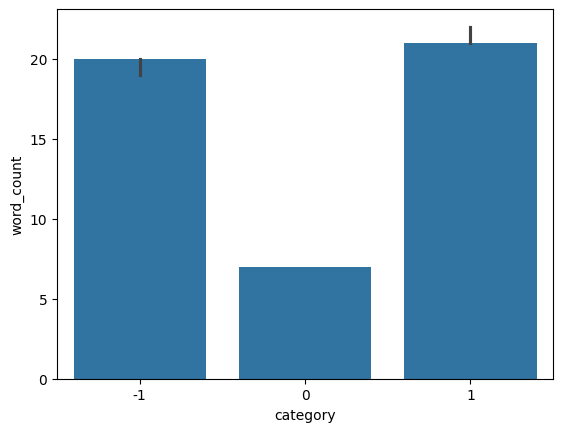

In [ ]:
## Median of category
sns.barplot(df,x='category',y='word_count',estimator='median')

In [ ]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
## Define the list of english stopwords
stop_words = set(stopwords.words('english'))

## Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x:len([word for word in x.split() if word in stop_words]))

In [ ]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
13771,they might have made this look like reply from...,1,19,7
25123,everyone gets only one pamphlet all these,0,7,3
7523,modi confesses 2002 made him jerk himself off ...,0,12,3
4360,there was genius redditor here who said all dr...,1,22,8
35836,cash for votes,0,3,1


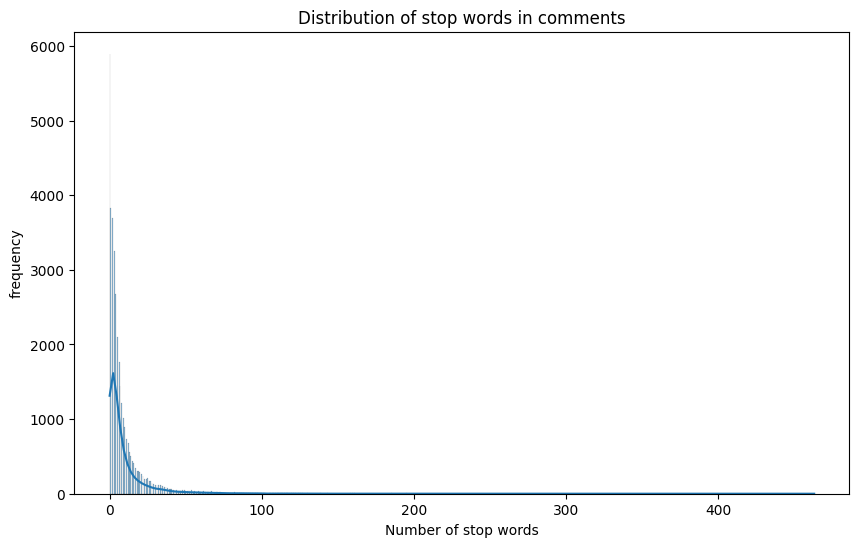

In [ ]:
## Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10,6))
sns.histplot(df['num_stop_words'],kde=True)
plt.title("Distribution of stop words in comments")
plt.xlabel("Number of stop words")
plt.ylabel("frequency")
plt.show()

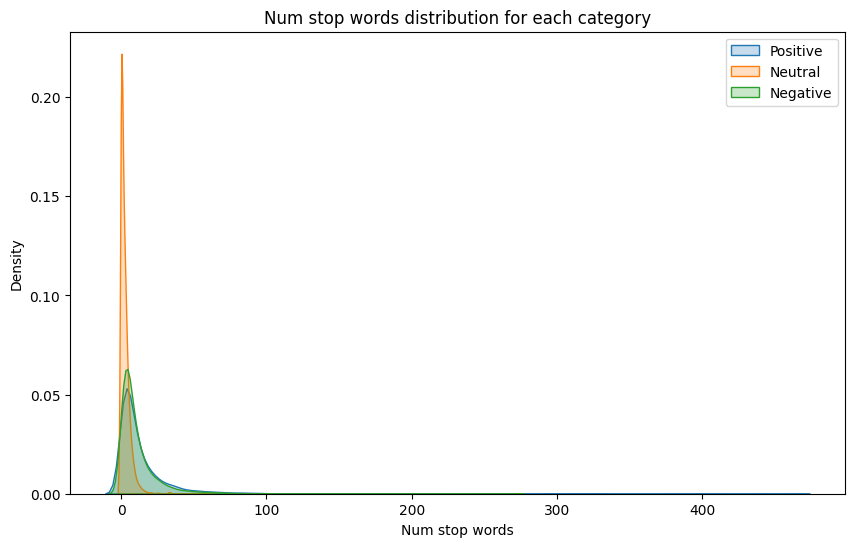

In [ ]:
## Create the figure and axes
plt.figure(figsize=(10,6))
## Plot KDE for category 1
sns.kdeplot(df[df['category']==1]['num_stop_words'],label="Positive",fill=True)
## Plot KDE for category 0
sns.kdeplot(df[df['category']==0]['num_stop_words'],label="Neutral",fill=True)
## Plot KDE for category -1
sns.kdeplot(df[df['category']==-1]['num_stop_words'],label="Negative",fill=True)

## Add title and labels
plt.title("Num stop words distribution for each category")
plt.xlabel("Num stop words")
plt.ylabel("Density")
plt.legend()
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

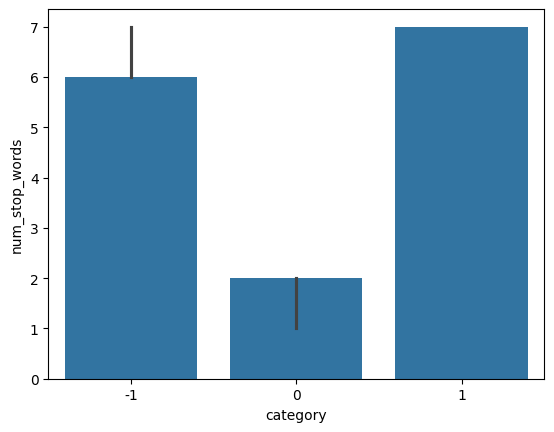

In [ ]:
## Median word counts among sentiments
sns.barplot(df,x='category',y='num_stop_words',estimator='median')

/tmp/ipython-input-3589487488.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df,x='count',y='stop_words',palette='viridis')


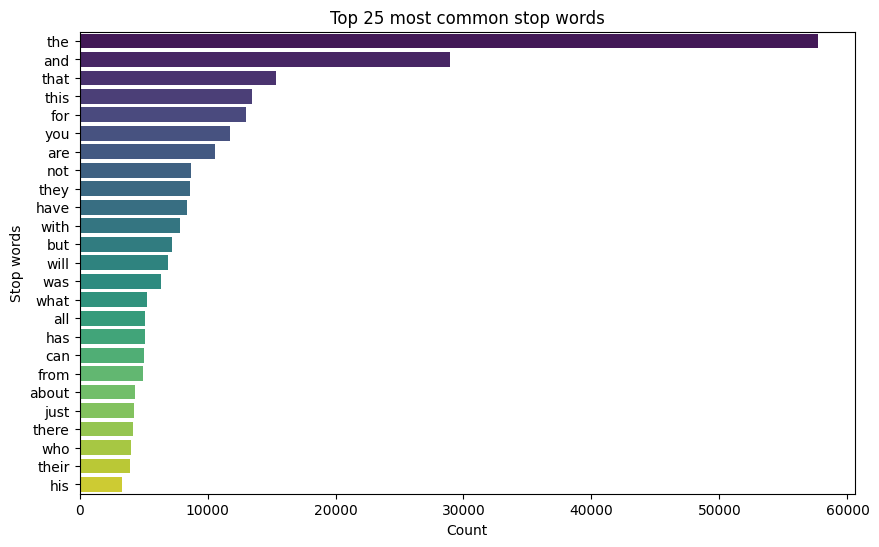

In [ ]:
from collections import Counter

all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

## COunt the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

## Convert the most common stop words to a Dataframe for plotting
top_25_df = pd.DataFrame(most_common_stop_words,columns=['stop_words','count'])

## Create a barplot for the top 25 most common stopwords
plt.figure(figsize=(10,6))
sns.barplot(data=top_25_df,x='count',y='stop_words',palette='viridis')
plt.title("Top 25 most common stop words")
plt.xlabel("Count")
plt.ylabel("Stop words")
plt.show()

In [ ]:
df['num_chars'] = df['clean_comment'].apply(len)
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [ ]:
df['num_chars'].describe()

,num_chars
count,36793.000000
mean,181.852798
std,359.702163
min,1.000000
25%,38.000000
50%,80.000000
75%,184.000000
max,8664.000000


In [ ]:
## Combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

## Count the frequency of each character
char_frequency = Counter(all_text)

## Convert the character frequency into a Dataframe for better display
char_frequency_df = pd.DataFrame(char_frequency.items(),columns=['character','frequency']).sort_values(by='frequency')

In [ ]:
char_frequency_df['character'].values

array(['∀', '￼', 'ಳ', ..., 't', 'e', ' '], dtype=object)

In [ ]:
char_frequency_df.tail(50)

,character,frequency
66,ि,232
456,ė,280
72,्,285
71,ो,305
67,ं,325
98,@,366
69,ी,394
60,\,463
68,े,519
57,”,665


In [ ]:
## Create a new column 'num_punchuation_chars' to count punchuation characters in each comment
df['num_punchuation_chars'] = df['clean_comment'].apply(
    lambda x:len([char for char in x if char in '.,!?:;"\'()[]{}-'])
)
df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punchuation_chars
7828,just envision him hitting with champaign and c...,-1,24,9,151,0
7820,hat jya tau paache nachan jee bhar,0,7,0,34,0
31855,ravish kumar and punya prasun bajpai are worth...,1,9,2,55,0
27480,these people are the reason can have good things,1,9,5,48,0
31426,rbi still not counting,0,4,1,22,0


In [ ]:
df['num_punchuation_chars'].describe()

,num_punchuation_chars
count,36793.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


/tmp/ipython-input-2367118354.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df,x='count',y='bigram',palette='magma')


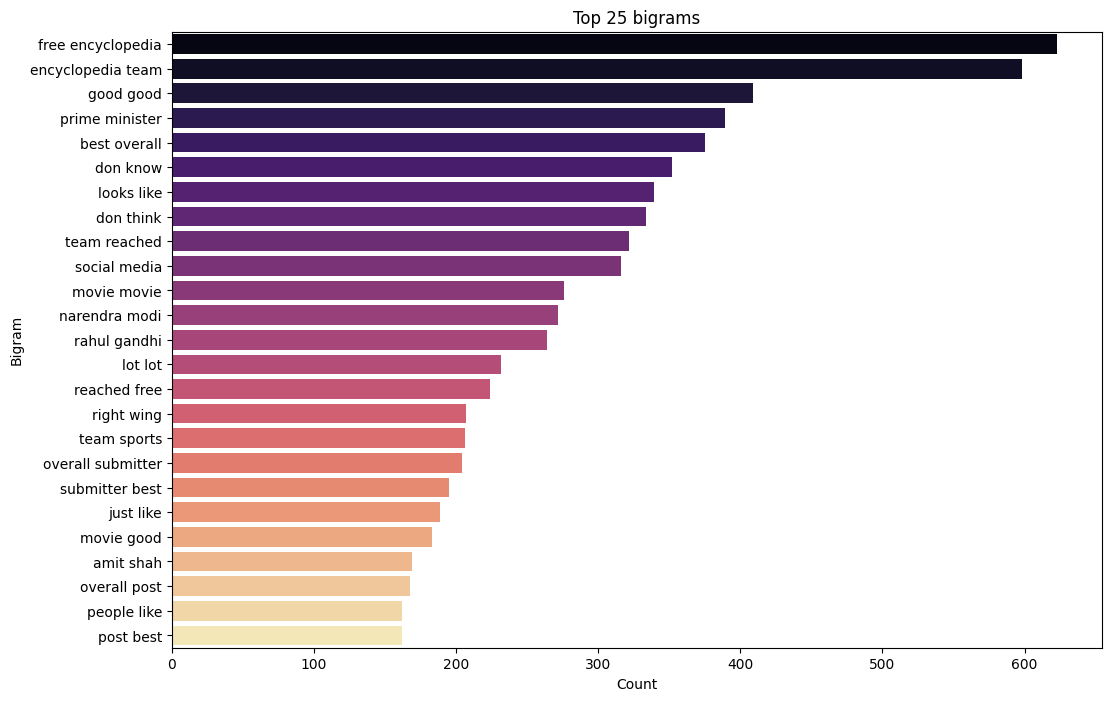

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

## Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus,n=None):
  vec = CountVectorizer(ngram_range=(2,2),stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq,key=lambda x:x[1],reverse=True)
  return words_freq[:n]

## Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'],25)
## convert the bigrams into a dataframe for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams,columns=['bigram','count'])

## plot countplot for the top 25 bigrams
plt.figure(figsize=(12,8))
sns.barplot(data=top_25_bigrams_df,x='count',y='bigram',palette='magma')
plt.title("Top 25 bigrams")
plt.xlabel("Count")
plt.ylabel("Bigram")
plt.show()

/tmp/ipython-input-1743657350.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df,x='count',y='trigram',palette='magma')


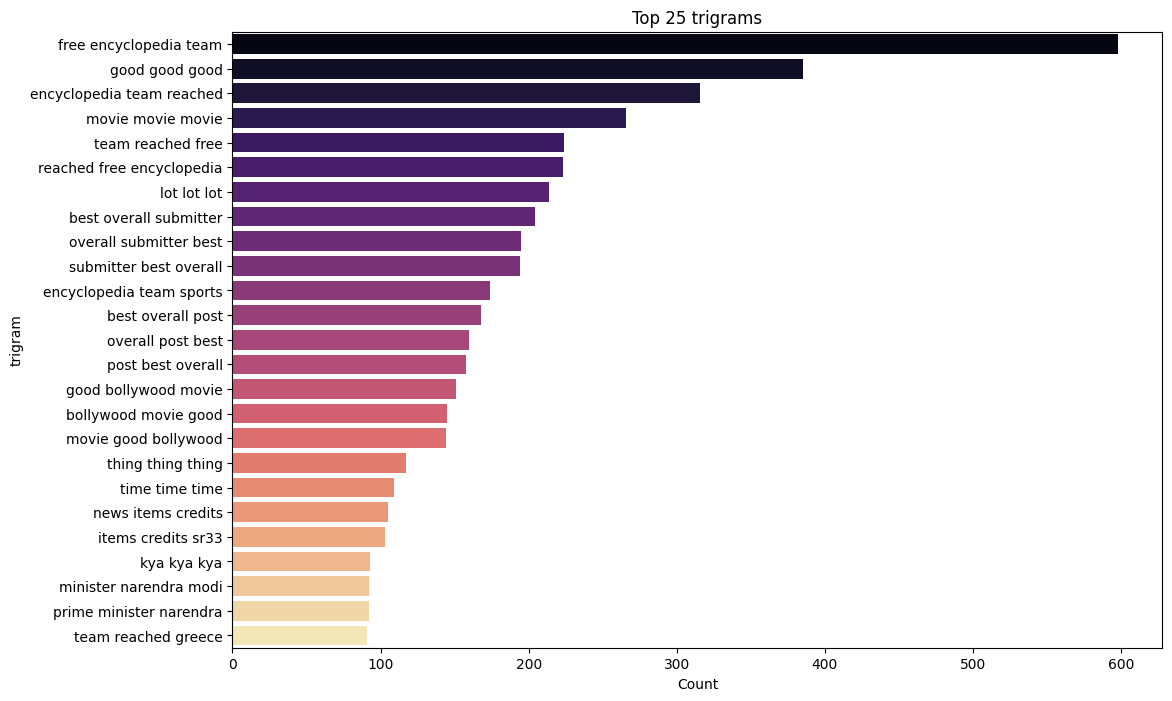

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

## Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus,n=None):
  vec = CountVectorizer(ngram_range=(3,3),stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq,key=lambda x:x[1],reverse=True)
  return words_freq[:n]

## Get the top 25 bigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'],25)
## convert the bigrams into a dataframe for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams,columns=['trigram','count'])

## plot countplot for the top 25 bigrams
plt.figure(figsize=(12,8))
sns.barplot(data=top_25_trigrams_df,x='count',y='trigram',palette='magma')
plt.title("Top 25 trigrams")
plt.xlabel("Count")
plt.ylabel("trigram")
plt.show()

In [ ]:
## Remove non-english characters from the 'clean_comment' column
## Keeping only standard English letters,digits,and common punchuation
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x:re.sub(r'[^A-Za-z0-9\s!?.,]','',str(x)))

In [ ]:
all_text = ' '.join(df['clean_comment'])

## Count the frequency of each character
char_frequency = Counter(all_text)

## Convert the character  frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(),columns=['character','frequency']).sort_values(by='frequency')

In [ ]:
char_frequency_df

,character,frequency
39,,1
40,,3
37,\t,11
38,,76
33,8,1199
36,7,1291
28,6,1403
29,4,1573
35,3,1617
27,5,1631


In [ ]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punchuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [ ]:
stop_words = set(stopwords.words('english'))-{'not','but','however','no','yet'}

df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

In [ ]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punchuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [ ]:
## Lemmetization

from nltk.stem import  WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,clean_comment,category,word_count,num_stop_words,num_chars,num_punchuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


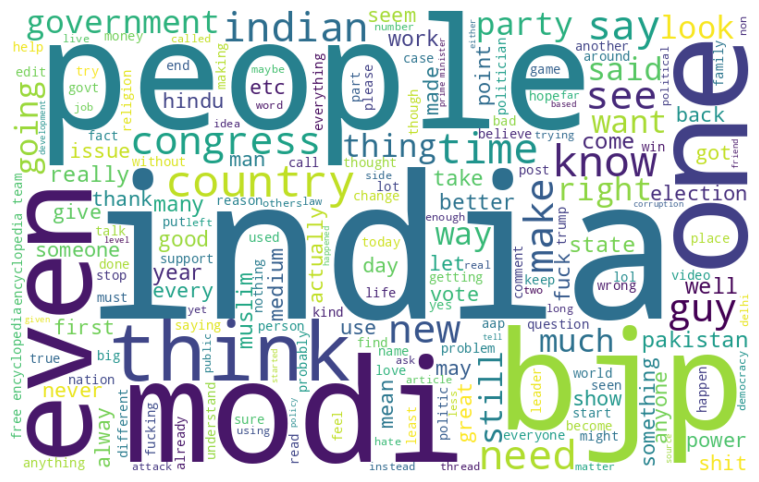

In [ ]:
from wordcloud import WordCloud

def plot_word_cloud(text):
  wordcloud = WordCloud(width=800,height=500,background_color='white').generate(' '.join(text))
  plt.figure(figsize=(10,6))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis("off")
  plt.show()

plot_word_cloud(df['clean_comment'])

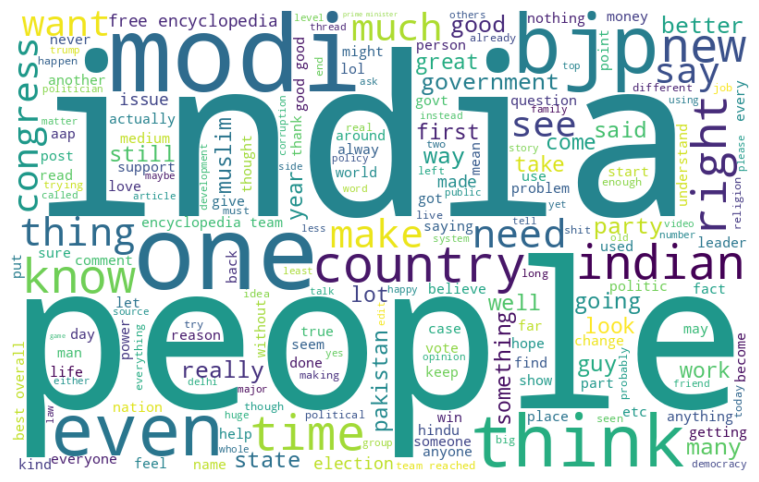

In [ ]:
plot_word_cloud(df[df['category']==1]['clean_comment'])

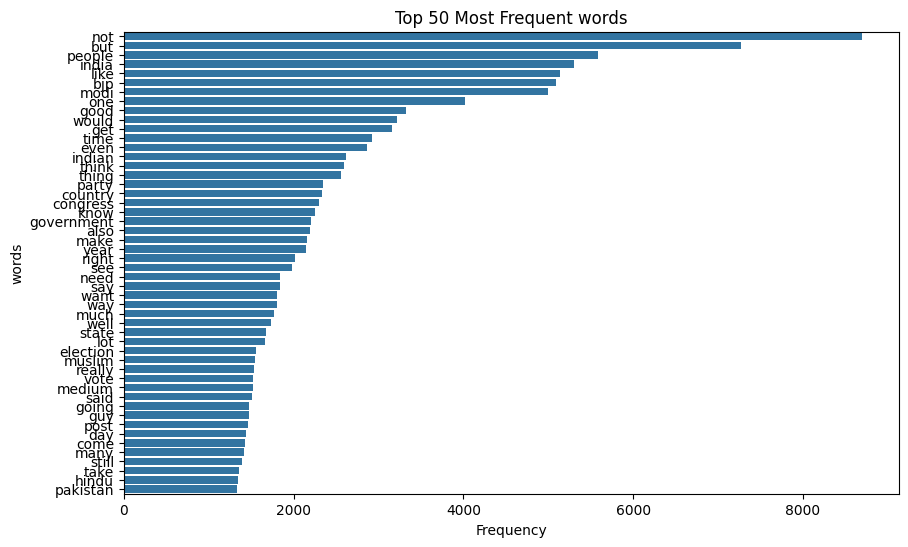

In [ ]:
def plot_top_n_word(df,n=20):
  """Plot the top N most frequent words in the dataset"""
  words = ' '.join(df['clean_comment']).split()

  counter = Counter(words)
  most_common_words = counter.most_common(n)

  words,counts = zip(*most_common_words)

  plt.figure(figsize=(10,6))
  sns.barplot(x=list(counts),y=list(words))
  plt.title(f"Top {n} Most Frequent words")
  plt.xlabel("Frequency")
  plt.ylabel("words")
  plt.show()

plot_top_n_word(df,n=50)